In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [21]:
df = pd.read_csv(r"OnlineRetail (1).csv", encoding='latin-1')

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [23]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [26]:
df.duplicated().sum()

5268

In [27]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [28]:
df.isnull().sum()/(len(df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [29]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [30]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [31]:
df.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        6/5/2011 11:37    2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        6/5/2011 11:37    2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       10/26/2011 12:46  1.25       14102.0     United Kingdom     8
572344     M          Manual                                48       10/24/2011 10:43  1.50       14607.0     United Kingdom     6
578289     23395      BELLE JARDINIERE CUSHION COVER        1        11/23/2011 14:07  3.75       17841.0     United Kingdom     6
                                                                                                                                ..
553915     21174      POTTERING IN THE SHED METAL SIGN      12       5/19/2011 19:51   2.

In [32]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [33]:
df.InvoiceDate.unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [34]:
df['CustomerID']=df['CustomerID'].astype(str)

In [35]:
#calculating the total amount
df['Amount'] = df['Quantity']*df['UnitPrice']

In [36]:
monetary= df.groupby('CustomerID')['Amount'].sum()
monetary= monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [37]:
#calculating the total transaction by getting the frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency.columns= ['CustomerID','Frequency']
frequency.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [38]:
import datetime as dt

In [39]:

#calculating the recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format = "%m/%d/%Y %H:%M")

In [40]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [41]:
#compute the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [42]:
recency

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00
4371,18287.0,42 days 03:21:00


In [43]:
recency['Diff']= recency['Diff'].dt.days
recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    541909 non-null  object         
 1   StockCode    541909 non-null  object         
 2   Description  540455 non-null  object         
 3   Quantity     541909 non-null  int64          
 4   InvoiceDate  541909 non-null  datetime64[ns] 
 5   UnitPrice    541909 non-null  float64        
 6   CustomerID   541909 non-null  object         
 7   Country      541909 non-null  object         
 8   Amount       541909 non-null  float64        
 9   Diff         541909 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), timedelta64[ns](1)
memory usage: 41.3+ MB


In [45]:
#merge the dataframe Recency,Frequency and Monetary.
rfm = pd.merge(recency, frequency, on='CustomerID', how ='inner')
rfm = pd.merge(rfm,monetary, on = 'CustomerID', how = 'inner')
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88
4371,18287.0,42,70,1837.28


Text(0.5, 0, 'attributes')

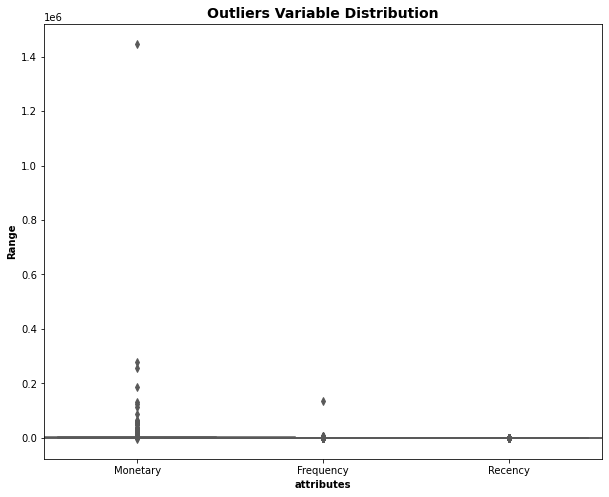

In [46]:
#outlier analysis of monetary frequency and recency
attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient = "v",palette = "Set2", whis=1.5, saturation=1, width = 1.7)
plt.title ("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("attributes",fontweight = 'bold')

In [47]:
#removing outliers from monetary
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 -1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

#removing outliers from recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 -1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

#removing outliers from frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 -1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [48]:
 #Outlier Detection
scaler = StandardScaler()
rfm_normalised = rfm[['Monetary','Frequency','Recency']]
rfm_normalised

,Monetary,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4366,173.90,9,73
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7


In [49]:
rfm_normalised = scaler.fit_transform(rfm_normalised)
rfm_normalised = pd.DataFrame(rfm_normalised)
rfm_normalised.shape

(4294, 3)

In [50]:
#KMeans with some arbitrary K
Kmeans = KMeans(n_clusters = 4 , max_iter = 50)
Kmeans.fit(rfm_normalised)

KMeans(max_iter=50, n_clusters=4)

In [51]:
Kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1])

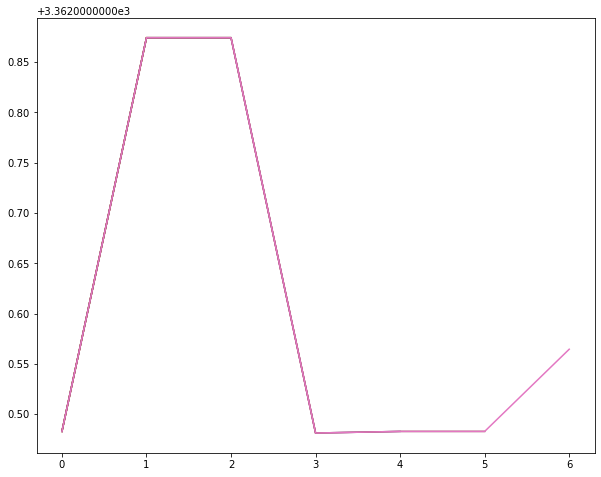

In [52]:
#finding the optimum clusters using elbow method
#elbow curve
#inertia
#sum of square of distances to closest clusters
SSD = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    Kmeans = KMeans(n_clusters = 4 , max_iter = 50)
    Kmeans.fit(rfm_normalised)
    
    
    SSD.append(Kmeans.inertia_)
    
    plt.plot(SSD)


In [53]:
#final model with K =3
Kmeans = KMeans(n_clusters =3 , max_iter = 50)
Kmeans.fit(rfm_normalised)

KMeans(max_iter=50, n_clusters=3)

In [62]:
Kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [64]:
rfm['cluster'] = Kmeans.labels_
rfm.head()

,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,182,4310.00,1
2,12348.0,74,31,1797.24,2
3,12349.0,18,73,1757.55,2
4,12350.0,309,17,334.40,0


In [68]:
rfm


,CustomerID,Recency,Frequency,Monetary,cluster
0,12346.0,325,2,0.00,0
1,12347.0,1,182,4310.00,1
2,12348.0,74,31,1797.24,2
3,12349.0,18,73,1757.55,2
4,12350.0,309,17,334.40,0
...,...,...,...,...,...
4366,18278.0,73,9,173.90,2
4367,18280.0,277,10,180.60,0
4368,18281.0,180,7,80.82,0
4369,18282.0,7,13,176.60,2


<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

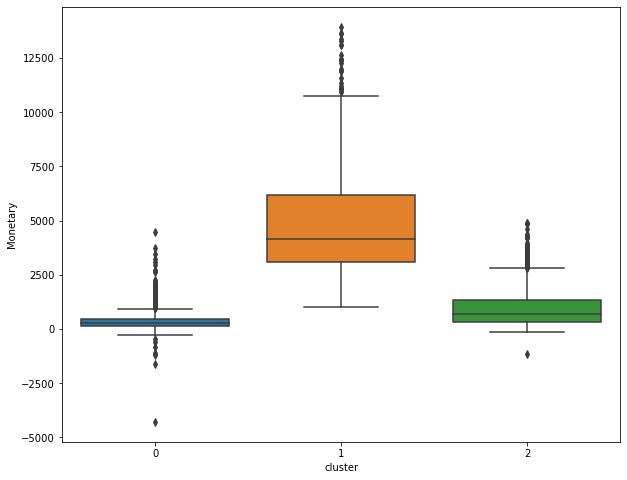

In [69]:
sns.boxplot(x='cluster', y='Monetary', data = rfm)

<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

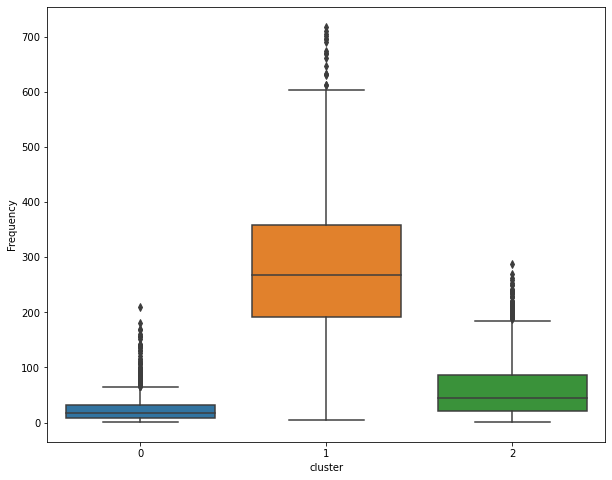

In [70]:
sns.boxplot(x='cluster', y='Frequency', data = rfm)

<AxesSubplot:xlabel='cluster', ylabel='Recency'>

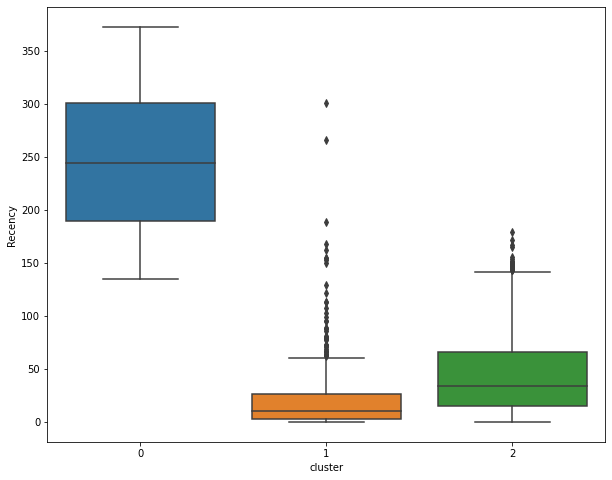

In [71]:
sns.boxplot(x='cluster', y='Recency', data = rfm)